In [1]:
import pandas as pd
from datetime import date
import re

In [2]:
dados = pd.read_csv('dados/dataframe_crimes.csv')

In [3]:
dados.head(1).T

,0
id,61614
bairro,NaN
created_at,2016-03-23 11:06:03.580
descricao,Eu estava aguardando o ônibus terminal Carrão ...
endereco,"Av. Prof. João Batista Conti, 936-1068 - Conj...."
latitude,-23.5507
longitude,-46.4378
registrou_,True
sexo,homem
tipo_assal,2


In [4]:
DIAS = [
    'Segunda-feira',
    'Terça-feira',
    'Quarta-feira',
    'Quinta-Feira',
    'Sexta-feira',
    'Sábado',
    'Domingo'
]

In [5]:
dados['data'] = pd.to_datetime(dados['created_at'])

In [6]:
dados['dia_da_semana'] = [dados['data'][x].strftime("%A") for x in range(len(dados))]

In [7]:
dados['dia_da_semana'] = [dados['data'][x].weekday() for x in range(len(dados))]

In [8]:
dados['dia_da_semana'] = [DIAS[dados['dia_da_semana'][x]] for x in range(len(dados))]

In [9]:
dados['hora'] = [dados['data'][x].hour for x in range(len(dados))]

In [10]:
dados['mes'] = [dados['data'][x].month for x in range(len(dados))]
dados['ano'] = [dados['data'][x].year for x in range(len(dados))]

In [11]:
dados['data_completa'] = dados['data'].dt.strftime('%Y/%m')
dados.sort_index(by='data_completa',inplace=True)
dados['data_completa'][0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


'2016/03'

In [21]:
dados['data_completa1'] = dados['data'].dt.strftime('%Y/%m/%d %H:$M')
dados['data_completa1'][0]

'2016/03/23 11:$M'

In [12]:
dados['data_completa'][0]

'2016/03'

# visualizações

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly

%matplotlib inline
sns.set_palette("Accent")
sns.set_style("darkgrid")


In [14]:
dia_da_semana = dados.groupby('dia_da_semana').count()
dia_da_semana.reset_index(inplace=True)
dia_da_semana.sort_index(by='id',ascending=False,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning:

by argument to sort_index is deprecated, please use .sort_values(by=...)



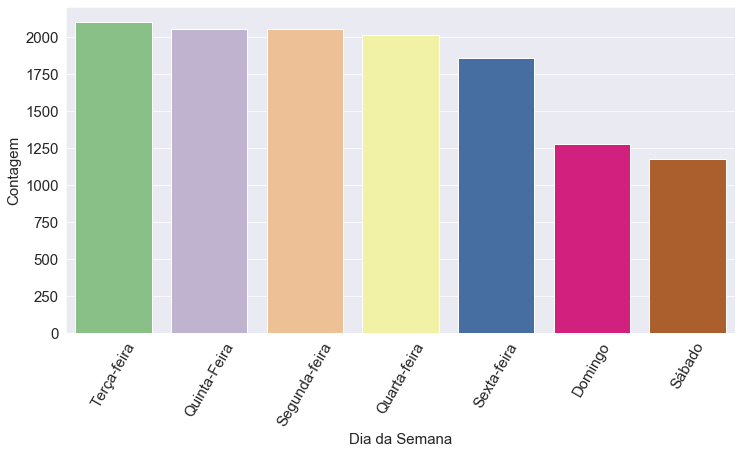

In [15]:
plt.figure(figsize=(12,6))
sns.barplot(data=dia_da_semana,x='dia_da_semana',y='id')
plt.xticks(rotation=60)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Contagem',fontsize=15)
plt.xlabel('Dia da Semana',fontsize=15)
plt.savefig('Graficos/Segmentação_por_Dia_da_Semana.png', format='png')

# os dias da semana (sexta sabado e domingo), sera retirado pois sa os que menos impactam nos dados

In [16]:
fig = px.scatter_mapbox(dados, lat="latitude", lon="longitude", hover_name="nome_dist",
                        hover_data=["titulo","descricao"],color='sexo', zoom=9, height=600,
                       animation_frame="data_completa")

fig.update_traces( marker=dict(color='MediumPurple',size=10))

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0},mapbox_style="open-street-map" )
fig.update_layout(legend=dict(x=0,y=1),title_text='Ocorrencia de Crimes em SP - Segmentação por sexo',)


plotly.offline.plot(fig,filename='Plot_timeseries.html')

'Plot_timeseries.html'

In [17]:
dados.head(1).T

,2448
id,43
bairro,NaN
created_at,2013-07-10 13:09:44.332
descricao,Quando estava subindo a rua Jamelão pra chegar...
endereco,"Rua Jamelão, 52-60 - Cidade Líder, São Paulo, ..."
latitude,-23.5507
longitude,-46.5105
registrou_,True
sexo,mulher
tipo_assal,1
